In [40]:
import numpy as np
from astropy.io import fits

import matplotlib
from astropy.wcs import WCS
from scipy import ndimage
import healpy as hp
from astropy_healpix import HEALPix
from astropy.coordinates import FK5, Galactic

import itertools

import cmocean
import cmocean.cm as cmo

from scipy.stats.mstats import mquantiles
from scipy.stats import gaussian_kde

from scipy import interpolate

import matplotlib as mpl
from matplotlib.ticker import LogFormatter
from matplotlib.ticker import LogFormatterSciNotation

from scipy import stats
import scipy
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib import colors

from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm.notebook import tqdm 

import pickle

### 0. Set plot defaults

In [41]:
fontScale = 14
params = {'axes.labelsize': fontScale,
        'axes.titlesize': fontScale,
        'axes.grid': False,
        'axes.linewidth': 2,
        'font.size': fontScale,
        'legend.fontsize': fontScale,
        'xtick.labelsize': fontScale,
        'ytick.labelsize': fontScale,
        'xtick.major.size': 4,
        'xtick.major.width': 1.2,
        'xtick.minor.size': 3,
        'xtick.minor.width': 1.2,
        'ytick.major.size': 4,
        'ytick.major.width': 1.2,
        'ytick.minor.size': 3,
        'ytick.minor.width': 1.2,
}
plt.rcParams.update(params)

from matplotlib import rc
rc('text', usetex=True)
res_dpi = 300
ext = 'pdf'

In [42]:
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : 12}
plt.rc('font', **font)
plt.rcParams['mathtext.fontset'] = 'dejavuserif'

## 1. Load maps (see Process_Data.ipynb)

In [43]:
fcnm = hp.read_map("fcnm_hi4pi_hpx_128.fits") 
nhi = hp.read_map("nhi_hi4pi_hpx_128.fits")
rhi = hp.read_map("rhi_hi4pi_hpx_128.fits")

fpah = hp.read_map("fpah_map.fits")
fpah_mask = hp.read_map("fpah_mask.fits")

qpah = hp.read_map("qPAH.fits")

IAME_20 = hp.read_map("I_AME_20GHz.fits", verbose=False)
IAME_30 = hp.read_map("I_AME_30GHz.fits", verbose=False)
nu_AME = hp.read_map("nu_weighted_AME.fits", verbose=False)

I_353 = hp.read_map("I_353.fits", verbose=False)
rad = hp.read_map("radiance.fits", verbose=False)

/Users/clairemurray/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:368: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  warnings.warn(
/Users/clairemurray/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:391: UserWarning: NSIDE = 128
  warnings.warn("NSIDE = {0:d}".format(nside))
/Users/clairemurray/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:400: UserWarning: ORDERING = RING in fits file
  warnings.warn("ORDERING = {0:s} in fits file".format(ordering))
/Users/clairemurray/anaconda3/lib/python3.8/site-packages/healpy/fitsfunc.py:428: UserWarning: INDXSCHM = IMPLICIT
  warnings.warn("INDXSCHM = {0:s}".format(schm))


#### first just mask latitudes for Fig 1

In [44]:
fspots = np.isnan(fcnm)
fpah[fspots] = np.nan
qpah[fspots] = np.nan
fcnm[fspots] = np.nan
IAME_20[fspots] = np.nan

# Figure 1

/Users/clairemurray/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:541: UserWarning: 0.0 180.0 -180.0 180.0
  warnings.warn(
/Users/clairemurray/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:656: UserWarning: The interval between parallels is 30 deg -0.00'.
  warnings.warn(
/Users/clairemurray/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:664: UserWarning: The interval between meridians is 30 deg -0.00'.
  warnings.warn(
/Users/clairemurray/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  newcm.set_over(newcm(1.0))
/Users/clairemurray/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a g

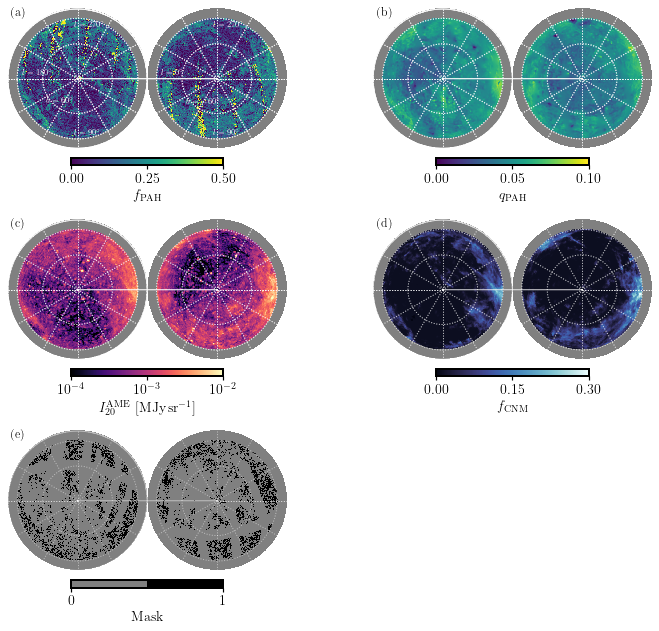

In [46]:
fig = plt.figure(0,[12,11])
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
bcolor='grey'

plt.axes(ax1)
cmapp = cm.viridis
hp.orthview(fpah, rot=[0,90,90], min=0, max=0.5, unit=r'$f_{\rm PAH}$', cmap=cmapp, xsize=2000, title='', 
            badcolor=bcolor, cbar=None, hold=True)
hp.graticule(color='white', alpha=0.5)

panela = plt.gcf()
axa = plt.gca()
image = axa.get_images()[0]
image.set_clim(0., 0.5) 
cbar = panela.colorbar(image, ax=axa, orientation='horizontal',
                      label=r'$f_{\rm PAH}$',
                      ticks=[0.,0.25,0.5], shrink=0.5, pad=0.05)

fntsz=8
plt.text(-1.8,0.05, r'$l=180^{\circ}$', color='white', fontsize=fntsz)
plt.text(-1.05,-0.80, r'$l=90^{\circ}$', color='white', fontsize=fntsz)
plt.text(-1.05,0.75, r'$l=270^{\circ}$', color='white', fontsize=fntsz)

plt.text(0.95,0.75, r'$l=270^{\circ}$', color='white', fontsize=fntsz)
plt.text(0.95,-0.80, r'$l=90^{\circ}$', color='white', fontsize=fntsz)
plt.text(0.2,0.05, r'$l=0^{\circ}$', color='white', fontsize=fntsz)

plt.text(-1.45,-0.35, r'$b=60^{\circ}$', color='white', fontsize=fntsz)
plt.text(0.55,-0.35, r'$b=-60^{\circ}$', color='white', fontsize=fntsz)

plt.text(-1.95, 0.9, '(a)')


plt.axes(ax2)
cmapp = cm.viridis
hp.orthview(qpah, rot=[0,90,90], min=0, max=0.1, unit=r'$q_{\rm PAH}$', cmap=cmapp, xsize=2000,  title='', 
            badcolor=bcolor, hold=True, cbar=None)
hp.graticule(color='white', alpha=0.5)
panelb = plt.gcf()
axb = plt.gca()
image = axb.get_images()[0]
image.set_clim(0., 0.1) 
cbar = panelb.colorbar(image, ax=axb, orientation='horizontal',
                      label=r'$q_{\rm PAH}$',
                      ticks=[0.,0.05,0.1], shrink=0.5, pad=0.05)

plt.text(-1.95, 0.9, '(b)')

plt.axes(ax3)
cmapp = cm.magma
hp.orthview(IAME_20, rot=[0,90,90], min=0.0001, max=0.008, unit=r'$I_{\rm AME,\, 20\,GHz}$', 
            norm='log', cmap=cmapp, xsize=2000, title='', badcolor=bcolor, hold=True,
           cbar=None)
hp.graticule(color='white', alpha=0.5)
plt.text(-1.95, 0.9, '(c)')
panelc = plt.gcf()
axc = plt.gca()
image = axc.get_images()[0]
image.set_clim(0.0001, 0.01)
formatter = LogFormatterSciNotation(10, labelOnlyBase=True) 
cbar = panelc.colorbar(image, ax=axc, orientation='horizontal',
                      label=r'$I^{\rm AME}_{20}\ [{\rm MJy\,sr^{-1}}]$', format=formatter,
                      ticks=[0.0001,0.001,0.01], shrink=0.5, pad=0.05)


plt.axes(ax4)
cmapp = cmo.ice
hp.orthview(fcnm, rot=[0,90,90], min=0, max=0.2, unit=r'$f_{\rm CNM}$', cmap=cmapp, xsize=2000, title='', 
            badcolor=bcolor, cbar=None, hold=True)
hp.graticule(color='white', alpha=0.5)
paneld = plt.gcf()
axd = plt.gca()
image = axd.get_images()[0]
image.set_clim(0., 0.3) 
cbar = paneld.colorbar(image, ax=axd, orientation='horizontal',
                      label=r'$f_{\rm CNM}$',
                      ticks=[0.,0.15,0.3], shrink=0.5, pad=0.05)

plt.text(-1.95, 0.9, '(d)')

tmask = np.ones(np.shape(fcnm))
tmask[np.isnan(fcnm)] = np.nan
tmask[fpah_mask==0.] = np.nan

plt.axes(ax5)
#cmapp = cm.Greys
cmapp = matplotlib.colors.ListedColormap(['gray', 'black'])
hp.orthview(tmask, rot=[0,90,90], min=0, max=1, unit=r'Mask', cmap=cmapp, xsize=2000, title='', 
            badcolor=bcolor, hold=True, cbar=None)
hp.graticule(color='white', alpha=0.5)
panele = plt.gcf()
axe = plt.gca()
image = axe.get_images()[0]
image.set_clim(0., 1) 
cbar = panele.colorbar(image, ax=axe, orientation='horizontal',
                      label=r'${\rm Mask}$',
                      ticks=[0.,1], shrink=0.5, pad=0.05)

plt.text(-1.95, 0.9, '(e)')


#plt.tight_layout()
plt.savefig('fig1_v3.pdf', format='pdf', dpi=200, bbox_inches='tight')

# Figure 2

#### now mask with fPAH mask and NHI limit for ensuing analysis

In [47]:
fspots = (fpah_mask!=1.)
fpah[fspots] = np.nan
qpah[fspots] = np.nan
fcnm[fspots] = np.nan

nhi_full = nhi.copy()
fcnm_full = fcnm.copy()

fspots = (nhi>4e20) 
fpah[fspots] = np.nan
qpah[fspots] = np.nan
fcnm[fspots] = np.nan

In [48]:
def bootstrap_resample(xlist, n=None):
    if n == None:
        n = len(xlist)
    resample_i = np.floor(np.random.rand(n)*len(xlist)).astype(int)

    xlist_resample = xlist[resample_i]
    return xlist_resample


In [49]:
def create_block_inds_gal(map_in, n_gal, n_side=128):
    """ Based on the shape of a healpix map, generate indices for a number
    of blocks spaced in Galactic latitude (b). Assumes RING ordered, Galactic coordinate input map

    Parameters
    ----------
    n_gal : (int) number of b blocks
    n_side : size of map
    
    Returns
    -------
    block_inds : list of indices corresponding to blocks
    """
    
    hpc = HEALPix(nside=n_side, order='RING', frame=Galactic())
    hpc_coords = hpc.healpix_to_skycoord([np.arange(len(map_in))])
    lats = np.squeeze(np.array(hpc_coords.galactic.b.degree))
    lats[np.abs(lats)<30.] = np.nan

    # Generate bins above 30 degrees spaced in latitude
    edges = mquantiles(lats[~np.isnan(lats)], np.arange(n_gal)/(n_gal-1))

    # Loop through and populate list of indices    
    block_inds = []
    for k in range(n_gal-1):
        inds = np.argwhere((lats >= edges[k]) & (lats < edges[k+1])).ravel()
        block_inds.append(inds)
        
    return block_inds

In [50]:
def cdfhist(arr, bins):
    """ Compute normalized cumulative distribution function from array and bins
    """
    fh = np.histogram(arr, bins=bins, density=True)
    fh = fh[0] / np.sum(fh[0])
    fh = np.cumsum(fh)
    return fh

In [51]:
def plot_block_boot_cdf(qpah_edges, fcnm_edges, qpah_map, fcnm_map, n_boot, n_blocks, ax, legendstr = r'$f_{\rm CNM}$'):
    """ Plot CDFs of q_PAH for increasing bins of f_CNM, with uncertainty ranges computed
    by block bootstrapping the sky in RA

    Parameters
    ----------
    qpah_edges : bin edges for q_PAH
    fcnm_edges : bin edges for f_CNM
    qpah_map : q_PAH HEALPix map 
    fcnm_map : f_CNM HEALPix map 
    n_boot : number of bootstrap trials
    n_blocks : number of blocks
    ax : axis instance to use
    """
    
    # compute number of bins from the bin edges, generate colors to cycle through
    n_qpah_bins = len(qpah_edges)-1
    n_fcnm_bins = len(fcnm_edges)-1
    color=iter(cm.magma_r(np.linspace(0.2,0.8,n_fcnm_bins)))

    
    # Compute Galactic block and their indices
    block_inds = create_block_inds_gal(qpah_map, n_blocks, nside_set)
    block_inds = np.array(block_inds)
    block_inds_ids = np.arange(n_blocks-1)

    # Loop through bins of increasing f_CNM
    for j in tqdm(range(n_fcnm_bins)):
    
        # Loop through number of bootstrap trials and generate list of CDFs
        qpah_hist_all = []
        for k in range(n_boot):
            # Bootstrap resample the indices corresponding to the blocks
            block_inds_sel = bootstrap_resample(block_inds_ids)

            qpah_temp = []
            fcnm_temp = []
            # Loop through the blocks and fill in the dummy maps with data corresponding to the selected blocks
            for i in range(n_blocks-1): 
                ids_samp = block_inds[block_inds_sel[i]]

                qpah_temp = qpah_temp + [qpah_map[ids_samp]]
                fcnm_temp = fcnm_temp + [fcnm_map[ids_samp]]

            qpah_temp = np.array(list(itertools.chain(*qpah_temp)))
            fcnm_temp = np.array(list(itertools.chain(*fcnm_temp)))

            # Compute CDFs of q_PAH from the selected RA blocks and which fall in the current f_CNM bin
            samp_spots = (~np.isnan(qpah_temp))  & (~np.isnan(fcnm_temp)) & (fcnm_temp > fcnm_edges[j]) & (fcnm_temp < fcnm_edges[j+1])

            qpah_hist = cdfhist(qpah_temp[samp_spots], qpah_edges) 
       
            # Dump CDF list in
            qpah_hist_all = qpah_hist_all + [np.array(qpah_hist)]
            
        qpah_hist_all = np.transpose(qpah_hist_all)

        qmin = np.zeros(n_qpah_bins)
        qmax = np.zeros(n_qpah_bins)
        qfull = np.zeros(n_qpah_bins)
                        
        for t in range(n_qpah_bins):
            qmin[t] = np.percentile(qpah_hist_all[t],16)
            qmax[t] = np.percentile(qpah_hist_all[t],84)
            qfull[t] = np.percentile(qpah_hist_all[t],50)
        
        # Plot CDF ranges (16th through 84th percentile)
        bincolor = next(color)   
        qpah_mids = (qpah_edges[1:] + qpah_edges[0:-1]) / 2.
        ax.fill_between(qpah_mids, qmin, qmax, color=bincolor, alpha=0.2)

        ax.plot(qpah_mids, qfull, color=bincolor, zorder=2, label=str(np.int((fcnm_edges[j])*1000.)/1000.)+r'$\leq $' +legendstr +r'$<$'+str(np.int((fcnm_edges[j+1])*1000.)/1000.))


In [52]:
def plot_block_boot_medians(x_edges, x_map, y_map, n_boot, n_blocks, ax, bincolor='black', label=None):
    """ Plot running medians of q_PAH for increasing bins of f_CNM, with uncertainty ranges computed
    by block bootstrapping the sky in RA

    Parameters
    ----------
    x_edges : bin edges for x
    y_map : x HEALPix map 
    y_map : y HEALPix map 
    n_boot : number of bootstrap trials
    n_blocks : number of blocks
    ax : axis instance to use
    label : label for plot
    """
    n_x_bins = len(x_edges)-1
    
    # Compute RA block and their indices
    block_inds = create_block_inds_gal(x_map, n_blocks, nside_set)
    block_inds = np.array(block_inds)
    block_inds_ids = np.arange(n_blocks-1)
    
    meds = []
    stds = []
    
    # Loop through bins of increasing f_CNM
    for j in tqdm(range(n_x_bins)):
    
        # Loop through number of bootstrap trials
        y_medians = []
        for k in range(n_boot):
            x_temp = []
            y_temp = []
            
            # Bootstrap resample the indices corresponding to the RA blocks
            block_inds_sel = bootstrap_resample(block_inds_ids)

            # Loop through the blocks and fill in the dummy maps with data corresponding to the selected blocks
            for i in range(n_blocks-1): 
                ids_samp = block_inds[block_inds_sel[i]]

                x_temp = x_temp + [x_map[ids_samp]]
                y_temp = y_temp + [y_map[ids_samp]]

            x_temp = np.array(list(itertools.chain(*x_temp)))
            y_temp = np.array(list(itertools.chain(*y_temp)))
                
            # Compute median of y from the selected RA blocks and which fall in the current x bin
            samp_spots = (~np.isnan(x_temp))  & (~np.isnan(y_temp)) & (x_temp > x_edges[j]) & (x_temp < x_edges[j+1]) 
            y_medians.append(np.nanmedian(y_temp[samp_spots]))
            
        meds.append(np.nanmedian(y_medians))
        stds.append(np.nanstd(y_medians))
        
    meds = np.array(meds)
    stds = np.array(stds)
    if len(x_edges)>2:
        
        xv = np.array(list(zip(x_edges[:-1],x_edges[:-1]))).ravel()
        xv = np.concatenate([xv[1:], x_edges[-1:]])
        yv = np.array(list(zip(meds, meds))).ravel()
        dv = np.array(list(zip(stds, stds))).ravel()

        ax.fill_between(xv, yv-dv, yv+dv, color=bincolor, alpha=0.4, zorder=20, label=label)
   

        x_mids = (x_edges[1:] + x_edges[0:-1]) / 2.

        #ax.plot(x_mids, meds, color='black')
#         ax.fill_between(x_mids, meds-stds, meds+stds, color='grey', alpha=0.5, zorder=20, label=label)

    
    else:
        ax.axhline(meds[0], color=bincolor, ls='dashed')
        ax.axhspan(meds[0]+stds[0], meds[0]-stds[0],color=bincolor, alpha=0.2, label=label) 
        
        return meds[0]
        

<ipython-input-51-b52c34250db3>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  block_inds = np.array(block_inds)


<ipython-input-51-b52c34250db3>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  block_inds = np.array(block_inds)


<ipython-input-52-4638e31f17d0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  block_inds = np.array(block_inds)


<ipython-input-52-4638e31f17d0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  block_inds = np.array(block_inds)


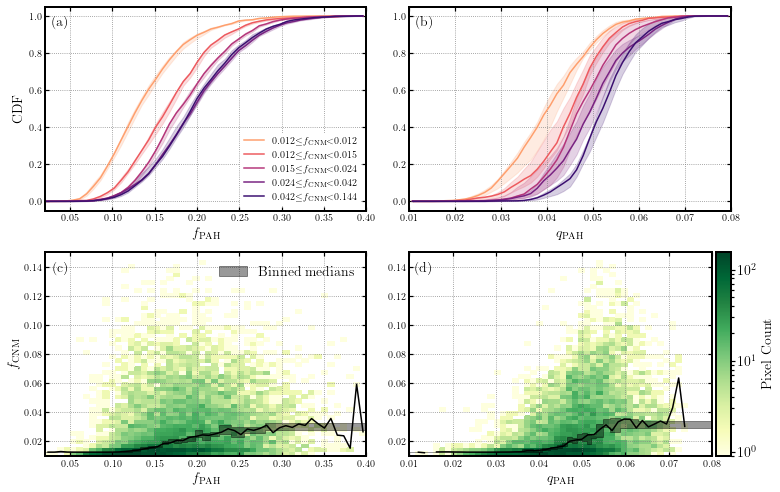

In [53]:
fig = plt.figure(0,[11,7])
ax = plt.subplot(221)
nside_set = 128

n_fcnm_bins = 6

fpah_bins = np.linspace(0.,0.4,50)
fcnm_arr = fcnm[(fcnm>0.0126)]
fcnm_bins = mquantiles(fcnm_arr, np.arange(n_fcnm_bins)/(n_fcnm_bins-1))


n_boot = 10
n_blocks = 10
n_median_bins = 20

dx =0.05
dy = 0.92
fntz = 14

plot_block_boot_cdf(fpah_bins, fcnm_bins, fpah, fcnm, n_boot, n_blocks, ax)
ax.set_xlabel(r'$f_{\rm PAH}$')
ax.grid(ls='dotted', color='grey') 
ax.set_ylabel(r'$\rm CDF$')
leg = ax.legend(loc='lower right', fontsize=10, facecolor='white',
                  framealpha=1)
leg.get_frame().set_linewidth(0.0)
ax.set_xlim(0.02,0.4)
ax.tick_params(axis='both', which='both', labelsize=10,
                 bottom=True, top=True, left=True, right=True,
                 direction='in')

ax.text(dx,dy,r"$\rm (a)$",
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes, fontsize=fntz)


ax = plt.subplot(222)
qpah_bins = np.linspace(0.01,0.08,50)
plot_block_boot_cdf(qpah_bins, fcnm_bins, qpah, fcnm, n_boot, n_blocks, ax)
ax.set_xlabel(r'$q_{\rm PAH}$')
ax.grid(ls='dotted', color='grey') 
ax.set_xlim(0.01,0.08)
ax.text(dx,dy,r"$\rm (b)$",
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes, fontsize=fntz)
ax.tick_params(axis='both', which='both', labelsize=10,
                 bottom=True, top=True, left=True, right=True,
                 direction='in')


ax = plt.subplot(223)
hist, xbins, ybins, im = ax.hist2d(fpah, fcnm, bins=50, range=[[0.02, .4], [0.01, 0.15]], cmap='YlGn', norm=colors.LogNorm(.9))
ax.set_ylabel(r'$f_{\rm CNM}$')
ax.set_xlabel(r'$f_{\rm PAH}$')
x_map = fpah
y_map = fcnm
fpah_bins = mquantiles(fpah[~np.isnan(fpah)], np.arange(n_median_bins)/(n_median_bins-1))

medians, edges, nums = stats.binned_statistic(fpah[~np.isnan(fpah)],fcnm[~np.isnan(fpah)],
                                              bins=xbins,statistic='median')
centers = (edges[:-1] + edges[1:]) / 2.
ax.plot(centers, medians,'k-')

plot_block_boot_medians(fpah_bins, x_map, y_map, n_boot, n_blocks, ax, label = 'Binned medians')
ax.grid(ls='dotted', color='grey') 
ax.set_xlim(0.02,0.4)
ax.text(dx,dy,r"$\rm (c)$",
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes, fontsize=fntz)
ax.tick_params(axis='both', which='both', labelsize=10,
                 bottom=True, top=True, left=True, right=True,
                 direction='in')

ax.legend(frameon=False)


ax = plt.subplot(224)
hist, xbins, ybins, im = ax.hist2d(qpah, fcnm, bins=50, range=[[0.01, .08], [0.01, 0.15]], cmap='YlGn', norm=colors.LogNorm(.9))
ax.set_xlabel(r'$q_{\rm PAH}$')
x_map = qpah
y_map = fcnm
qpah_bins = mquantiles(qpah[~np.isnan(qpah)], np.arange(n_median_bins)/(n_median_bins-1))

medians, edges, nums = stats.binned_statistic(qpah[~np.isnan(qpah) & (~np.isnan(fcnm))],fcnm[~np.isnan(qpah)& (~np.isnan(fcnm))],
                                              bins=xbins,statistic='median')
centers = (edges[:-1] + edges[1:]) / 2.
ax.plot(centers, medians,'k-')

plot_block_boot_medians(qpah_bins, x_map, y_map, n_boot, n_blocks, ax)
ax.grid(ls='dotted', color='grey') 
ax.set_xlim(0.01,0.08)
ax.tick_params(axis='both', which='both', labelsize=10,
                 bottom=True, top=True, left=True, right=True,
                 direction='in')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im, cax=cax,label=r'${\rm Pixel\ Count}$')

ax.text(dx,dy,r"$\rm (d)$",
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes, fontsize=fntz)


plt.tight_layout()
plt.savefig('fig2_nhicut.pdf', format='pdf')

# Figure 3

In [54]:
def plot_cool_contours(xx, yy, kvals, ax, cmapp='Greys', find_grid=True, contourcolor=None, contourstyle=None, lww=2, xlog=False, ylog=False):

    # fit an array of size [Ndim, Nsamples]
    if contourcolor is None:
        contourcolor=tbcolor

    # evaluate on a regular grid
    if find_grid:
        data = np.vstack([xx, yy])
        kde = gaussian_kde(data)
        if xlog:
            xgrid = np.logspace(kvals[0], kvals[1], 50)
        else:
            xgrid = np.linspace(kvals[0], kvals[1], 50)
        if ylog:
            ygrid = np.logspace(kvals[2], kvals[3], 50)
        else:
            ygrid = np.linspace(kvals[2], kvals[3], 50)
            
        Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
        z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))
        z = z.reshape(Xgrid.shape)
        z = z / z.sum()
    else:
        z = xx.T
        z = z / z.sum()
        
    n = 1000
    t = np.linspace(0, z.max(), n)
    integral = ((z >= t[:, None, None]) * z).sum(axis=(1,2))

    f = interpolate.interp1d(integral, t)

    t_contours = f(np.array([0.98, 0.95, 0.68]))
    
    if xlog:
        xext = [10**kvals[0], 10**kvals[1]]
    else:
        xext = [kvals[0], kvals[1]]
        
    if ylog:
        yext = [10**kvals[2], 10**kvals[3]]
    else:
        yext = [kvals[2], kvals[3]]
    ax.contour(z, t_contours, extent=[xext[0], xext[1], yext[0], yext[1]], colors=contourcolor, zorder=1,linewidths=lww, linestyles=contourstyle, alpha=0.8) #cmap=cmapp)
   

<ipython-input-52-4638e31f17d0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  block_inds = np.array(block_inds)


<ipython-input-52-4638e31f17d0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  block_inds = np.array(block_inds)


<ipython-input-55-4976abb8a230>:42: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  h  = ax2.hist2d(fcnm, IAME_20/nhi, bins=50, range=[[0.01, 0.15],[0.2e-24, 6e-24]], cmap='YlGn',


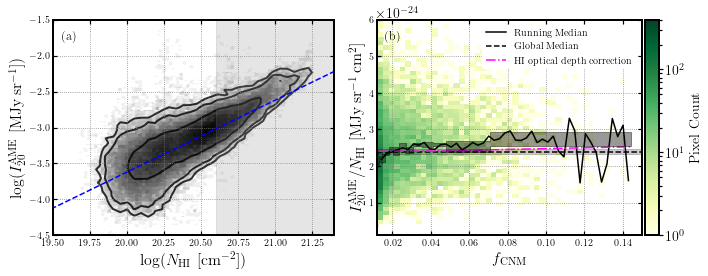

In [55]:
fig = plt.figure(0,[10,4])
ax = plt.subplot(121)
ax2 = plt.subplot(122)

ax.tick_params(axis='both', which='both', labelsize=10,
                 bottom=True, top=True, left=True, right=True,
                 direction='in')
ax2.tick_params(axis='both', which='both', labelsize=10,
                 bottom=True, top=True, left=True, right=True,
                 direction='in')

nhiminsel = 1e16
nhimaxsel = 4e20

n_fcnm_bins = n_median_bins
fcnm_bins = mquantiles(fcnm_arr, np.arange(n_fcnm_bins)/(n_fcnm_bins-1))

taucolor='orange'

im = ax.hexbin(np.log10(nhi), np.log10(IAME_20), gridsize=100, cmap='Greys', bins='log', extent=[19.3,21.6,-4.5,-1.5])
H, xt, yt = np.histogram2d(np.log10(nhi), np.log10(IAME_20), bins=50, range=[[19.3,21.6],[-4.5,-1.5]])
kvals = [19.3,21.6,-4.5,-1.5]
plot_cool_contours(H, H, kvals, ax, 'bone', find_grid=False, contourcolor='black')

ax.set_xlabel(r'${\rm log}(N_{\rm HI}\ [{\rm cm}^{-2}])$', fontsize=16)
ax.set_ylabel(r'${\rm log}(I_{20}^{\rm AME}\ [{\rm MJy\,sr^{-1}}])$', fontsize=16)
ax.set_xlim(19.5, 21.4)

ax.axvspan(19.2, np.log10(nhiminsel), alpha=0.2, color='grey')
ax.axvspan(np.log10(nhimaxsel), 22., alpha=0.2, color='grey')

# hack to get this line into the legend in ax2
ax2.axvline(100., color='k', ls='dashed',  label=r'${\rm Global\ Median}$')

overall_slope = plot_block_boot_medians([0,1], fcnm, IAME_20/nhi, n_boot, n_blocks, ax2, bincolor='k')
nbins =np.logspace(19.2, 22, 5)
ax.plot(np.log10(nbins), np.log10(nbins*overall_slope), color='blue', ls='dashed')


plot_block_boot_medians(fcnm_bins, fcnm, IAME_20/nhi, n_boot, n_blocks, ax2, label='Binned medians')

h  = ax2.hist2d(fcnm, IAME_20/nhi, bins=50, range=[[0.01, 0.15],[0.2e-24, 6e-24]], cmap='YlGn', 
               norm=colors.LogNorm(), vmax=400) 
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(h[3], cax=cax,label=r'${\rm Pixel\ Count}$')

medians, edges, nums = stats.binned_statistic(fcnm[~np.isnan(fcnm)], IAME_20[~np.isnan(fcnm)]/nhi[~np.isnan(fcnm)],
                                              bins=h[1],statistic='median')
centers = (edges[:-1] + edges[1:]) / 2.
ax2.plot(centers[1:], medians[1:],'k-', label=r'${\rm Running\ Median}$')

ax2.set_xlabel(r'$f_{\rm CNM}$', fontsize=16)
ax2.set_ylabel(r'$ I_{20}^{\rm AME}/N_{\rm HI}\ [{\rm MJy\,sr^{-1}\,cm^2}]$', fontsize=16)

# apply opacity correction by computing median RHI correction per fCNM bin
rhi_vals = []
for j in range(len(fcnm_bins)-1):
    fspots =  (~np.isnan(fcnm))  & (~np.isnan(rhi)) & (fcnm > fcnm_bins[j]) & (fcnm< fcnm_bins[j+1])
    rhi_vals.append(np.nanmedian(rhi[fspots]))
# add final bin to extend plot to fcnm=0.3
fspots =  (~np.isnan(fcnm))  & (~np.isnan(rhi)) & (fcnm >= fcnm_bins[-1]) 
rhi_vals.append(np.nanmedian(rhi[fspots]))

ax2.plot(fcnm_bins, overall_slope*np.array(rhi_vals), color='magenta', ls='-.',label=r'${\rm HI\ optical\ depth\ correction}$')

    
ax2.set_ylim(0.1e-24,6e-24)
ax2.set_xlim(0.012, 0.15)

handles, labels = ax2.get_legend_handles_labels()
order = [1,0,2]
leg = ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order]
                ,loc="upper right", 
                prop={'size': 10},numpoints=1, facecolor='white',
                  framealpha=1)
leg.get_frame().set_linewidth(0.0)


ax.grid(ls='dotted', color='grey') 
ax2.grid(ls='dotted', color='grey') 
ax.text(0.06, 0.92,r"$\rm (a)$",
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
ax2.text(0.06, 0.92,r"$\rm (b)$",
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax2.transAxes)
plt.tight_layout()
plt.savefig('fig3_nhicut.pdf', format='pdf')

## testing fcnm vs. NH and rad/NH vs. fcnm for referee

<ipython-input-52-4638e31f17d0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  block_inds = np.array(block_inds)


<ipython-input-56-b6128e3f0cce>:30: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  h = ax2.hist2d(fcnm, rad/nhi, bins=50, range=[[0.01, 0.15],[1e-28, 5e-28]], cmap='YlGn',


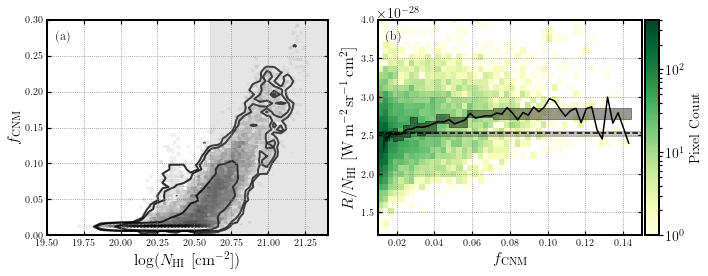

In [56]:
fig = plt.figure(0,[10,4])
ax = plt.subplot(121)
ax2 = plt.subplot(122)

ax.tick_params(axis='both', which='both', labelsize=10,
                 bottom=True, top=True, left=True, right=True,
                 direction='in')
ax2.tick_params(axis='both', which='both', labelsize=10,
                 bottom=True, top=True, left=True, right=True,
                 direction='in')

im = ax.hexbin(np.log10(nhi_full), fcnm_full, gridsize=100, cmap='Greys', bins='log', extent=[19.3,21.6,0,0.3])
H, xt, yt = np.histogram2d(np.log10(nhi_full), fcnm_full, bins=50, range=[[19.3,21.6],[0,0.3]])
kvals = [19.3,21.6,0.,0.3]
plot_cool_contours(H, H, kvals, ax, 'bone', find_grid=False, contourcolor='black')

ax.set_xlabel(r'${\rm log}(N_{\rm HI}\ [{\rm cm}^{-2}])$', fontsize=16)
ax.set_ylabel(r'$f_{\rm CNM}$', fontsize=16)
ax.set_xlim(19.5, 21.4)

ax.axvspan(19.2, np.log10(nhiminsel), alpha=0.2, color='grey')
ax.axvspan(np.log10(nhimaxsel), 22., alpha=0.2, color='grey')


overall_slope = plot_block_boot_medians([0,1], fcnm, rad/nhi, n_boot, n_blocks, ax2, bincolor='k')


plot_block_boot_medians(fcnm_bins, fcnm, rad/nhi, n_boot, n_blocks, ax2, label='Binned medians')

h = ax2.hist2d(fcnm, rad/nhi, bins=50, range=[[0.01, 0.15],[1e-28, 5e-28]], cmap='YlGn', 
               norm=colors.LogNorm(), vmax=400) 
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(h[3], cax=cax,label=r'${\rm Pixel\ Count}$')

medians, edges, nums = stats.binned_statistic(fcnm[~np.isnan(fcnm)], rad[~np.isnan(fcnm)]/nhi[~np.isnan(fcnm)],
                                              bins=h[1],statistic='median')
centers = (edges[:-1] + edges[1:]) / 2.
ax2.plot(centers[1:], medians[1:],'k-', label=r'${\rm Running\ Median}$')

ax2.set_xlabel(r'$f_{\rm CNM}$', fontsize=16)
ax2.set_ylabel(r'$ R/N_{\rm HI}\ [{\rm W\,m^{-2}\,sr^{-1}\,cm^2}]$', fontsize=16)

ax2.set_ylim(1.2e-28,4e-28)
ax2.set_xlim(0.01, 0.15)

# handles, labels = ax2.get_legend_handles_labels()
# order = [1,0,2]
# leg = ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order]
#                 ,loc="upper right", 
#                 prop={'size': 10},numpoints=1, facecolor='white',
#                   framealpha=1)
# leg.get_frame().set_linewidth(0.0)


ax.grid(ls='dotted', color='grey') 
ax2.grid(ls='dotted', color='grey') 
ax.text(0.06, 0.92,r"$\rm (a)$",
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)
ax2.text(0.06, 0.92,r"$\rm (b)$",
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax2.transAxes)
plt.tight_layout()
plt.savefig('fig3_radiance.pdf', format='pdf')

# Figure 4

0.018881110474467278 0.004996840001572676


<ipython-input-57-6f280d8d5585>:16: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  hist, xbins, ybins, im = ax[0].hist2d(fcnm[idx], ratio[idx], bins=40,
<ipython-input-52-4638e31f17d0>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  block_inds = np.array(block_inds)



0.09288850843917436
0.018881110474467278 30.63980484008789


<ipython-input-57-6f280d8d5585>:53: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  hist, xbins, ybins, im = ax[1].hist2d(fcnm[idx], nu_AME[idx], bins=40,


OSError: ysard_wnm.dat not found.

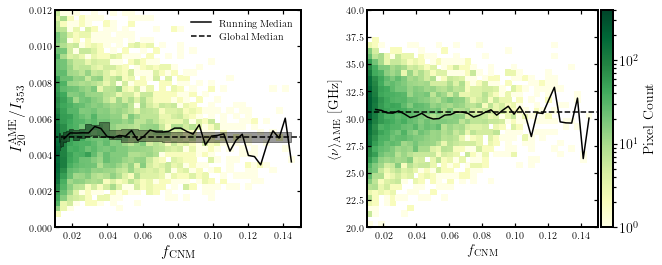

In [57]:
fig, ax = plt.subplots(1,2,figsize=(10., 4.))
plt.subplots_adjust(wspace=0.27)

ax[0].set_xlabel(r'$f_{\rm CNM}$', fontsize=16)
ax[0].set_ylabel(r'$I_{20}^{\rm AME}/I_{353}$', fontsize=16)
ax[0].set_xlim(0,0.3)
ax[0].tick_params(axis='both', which='both', labelsize=10,
                 bottom=True, top=True, left=True, right=True,
                 direction='in')

idx = ~np.isnan(fcnm)
ratio = IAME_20/I_353

print(np.median(fcnm[idx]), np.median(ratio[idx]))

hist, xbins, ybins, im = ax[0].hist2d(fcnm[idx], ratio[idx], bins=40,
             range=[[0.01, .15], [0., 0.012]], cmap='YlGn', vmax=400,
                                  norm=colors.LogNorm())

medians, edges, nums = stats.binned_statistic(fcnm[idx],ratio[idx],
                                              bins=xbins,statistic='median')
centers = (edges[:-1] + edges[1:]) / 2.
ax[0].plot(centers[1:], medians[1:],'k-', label=r'${\rm Running\ Median}$')
#cbar = fig.colorbar(im, ax=ax[0], orientation='horizontal', pad=0.2)
#cbar.ax.set_xlabel(r'${\rm Pixel\ Count}$', fontsize=14)

ax[0].hlines(np.median(ratio[idx]), 0., 0.3, linestyle='--', color='k',
            label=r'${\rm Global\ Median}$')

plot_block_boot_medians(fcnm_bins, fcnm, ratio, n_boot, 
                        n_blocks, ax[0], label='Binned medians')

handles, labels = ax[0].get_legend_handles_labels()
order = [0,1]
leg = ax[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order]
                ,loc="upper right", 
                prop={'size': 10}, numpoints=1, facecolor='white',
                  framealpha=1)
leg.get_frame().set_linewidth(0.0)

rs, pval = stats.spearmanr(fcnm[idx], ratio[idx])
print(rs)

ax[1].set_xlabel(r'$f_{\rm CNM}$')
ax[1].set_ylabel(r'$\langle \nu \rangle_{\rm AME}\ [{\rm GHz}]$')
ax[1].set_xlim(0,0.3)
ax[1].tick_params(axis='both', which='both', labelsize=10,
                 bottom=True, top=True, left=True, right=True,
                 direction='in')

print(np.median(fcnm[idx]), np.median(nu_AME[idx]))

hist, xbins, ybins, im = ax[1].hist2d(fcnm[idx], nu_AME[idx], bins=40,
             range=[[0.01, .15], [20, 40]], cmap='YlGn', vmax=400.,
                                  norm=colors.LogNorm())

medians, edges, nums = stats.binned_statistic(fcnm[idx],nu_AME[idx],
                                              bins=xbins,statistic='median')
centers = (edges[:-1] + edges[1:]) / 2.
ax[1].plot(centers[1:], medians[1:],'k-')

#cb = fig.colorbar(im, ax=ax.ravel().tolist())
#cb.ax.set_ylabel(r'${\rm Pixel\ Count}$', fontsize=14)

divider = make_axes_locatable(ax[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im, cax=cax,label=r'${\rm Pixel\ Count}$')

ax[1].hlines(np.median(nu_AME[idx]), 0., 0.3, linestyle='--', color='k')

# Theory curves
ywnm_nu, ywnm = np.genfromtxt('ysard_wnm.dat', unpack=True)
ycnm_nu, ycnm = np.genfromtxt('ysard_cnm.dat', unpack=True)

ywnm_nuInu = np.trapz(ywnm_nu, ywnm_nu*ywnm)
ywnm_Inu = np.trapz(ywnm_nu, ywnm)
ycnm_nuInu = np.trapz(ycnm_nu, ycnm_nu*ycnm)
ycnm_Inu = np.trapz(ycnm_nu, ycnm)

nu_ysard = (((1.-centers)/0.9)*ywnm_nuInu + (centers/0.1)*ycnm_nuInu)/ \
    (((1.-centers)/0.9)*ywnm_Inu + (centers/0.1)*ycnm_Inu)


hwnm_nu, hwnm = np.genfromtxt('hoang_wnm.dat', unpack=True)
hcnm_nu, hcnm = np.genfromtxt('hoang_cnm.dat', unpack=True)

hwnm_nuInu = np.trapz(hwnm_nu, hwnm_nu*hwnm)
hwnm_Inu = np.trapz(hwnm_nu, hwnm)
hcnm_nuInu = np.trapz(hcnm_nu, hcnm_nu*hcnm)
hcnm_Inu = np.trapz(hcnm_nu, hcnm)

hfrac = 0.35/(0.35+1.4)

nu_hoang = (((1.-centers)/(1.-hfrac))*hwnm_nuInu + (centers/hfrac)*hcnm_nuInu)/ \
    (((1.-centers)/(1.-hfrac))*hwnm_Inu + (centers/hfrac)*hcnm_Inu)

ax[1].plot(centers, nu_ysard, 'b-', label=r'${\rm Ysard\ et\ al.\ 2010}$')
ax[1].plot(centers, nu_hoang, 'b:', label=r'${\rm Hoang\ et\ al.\ 2011}$')

ax[0].grid(ls='dotted', color='grey') 
ax[1].grid(ls='dotted', color='grey')

plot_block_boot_medians(fcnm_bins, fcnm[idx], nu_AME[idx], n_boot, 
                        n_blocks, ax[1], label='Binned medians')

handles, labels = ax[1].get_legend_handles_labels()
order = [0,1]
leg = ax[1].legend([handles[idx] for idx in order],[labels[idx] for idx in order]
                ,loc="lower right", 
                prop={'size': 10},numpoints=1, facecolor='white',
                  framealpha=1)
leg.get_frame().set_linewidth(0.0)

plt.tight_layout()
plt.savefig('fig4_nhicut.' + ext,format=ext,dpi=res_dpi,bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(6., 4.))

ax.set_xlabel(r'$f_{\rm CNM}$', fontsize=16)
ax.set_ylabel(r'$I_{20}^{\rm AME}/R$', fontsize=16)
ax.set_xlim(0,0.3)
ax.tick_params(axis='both', which='both', labelsize=10,
                 bottom=True, top=True, left=True, right=True,
                 direction='in')

idx = ~np.isnan(fcnm)
ratio = IAME_20/rad

print(np.median(fcnm[idx]), np.median(ratio[idx]))

hist, xbins, ybins, im = ax.hist2d(fcnm[idx], ratio[idx], bins=40,
             range=[[0.012, .15], [0., 5e4]], cmap='YlGn', vmax=400,
                                  norm=colors.LogNorm())

medians, edges, nums = stats.binned_statistic(fcnm[idx],ratio[idx],
                                              bins=xbins,statistic='median')
centers = (edges[:-1] + edges[1:]) / 2.
ax.plot(centers[1:], medians[1:],'k-', label=r'${\rm Running\ Median}$')
#cbar = fig.colorbar(im, ax=ax[0], orientation='horizontal', pad=0.2)
#cbar.ax.set_xlabel(r'${\rm Pixel\ Count}$', fontsize=14)

ax.hlines(np.median(ratio[idx]), 0., 0.3, linestyle='--', color='k',
            label=r'${\rm Global\ Median}$')

plot_block_boot_medians(fcnm_bins, fcnm, ratio, n_boot, 
                        n_blocks, ax, label='Binned medians')

handles, labels = ax.get_legend_handles_labels()
order = [0,1]
leg = ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order]
                ,loc="upper right", 
                prop={'size': 10}, numpoints=1, facecolor='white',
                  framealpha=1)
leg.get_frame().set_linewidth(0.0)

rs, pval = stats.spearmanr(fcnm[idx], ratio[idx])
print(rs)

plt.savefig('fig4_nhicut_radiance.' + ext,format=ext,dpi=res_dpi,bbox_inches='tight')

## correlation coefficients

In [ ]:
def block_boot_correlation(x, y, n_blocks, n_boot):
    nside_set = 128
    
    # Compute Galactic block and their indices
    block_inds = create_block_inds_gal(x, n_blocks, nside_set)
    block_inds = np.array(block_inds)
    block_inds_ids = np.arange(n_blocks-1)
    
    for k in range(n_boot):
            # First make dummy array of NaNs in the shape of the qpah and fcnm maps
            x_temp = np.empty_like(x)
            y_temp = np.empty_like(y)
            x_temp[:] = np.nan
            y_temp[:] = np.nan
            
            # Bootstrap resample the indices corresponding to the blocks
            block_inds_sel = bootstrap_resample(block_inds_ids)

            # Loop through the blocks and fill in the dummy maps with data corresponding to the selected blocks
            for i in range(n_blocks-1): 
                ids_samp = block_inds[block_inds_sel[i]]

                x_temp[ids_samp] = x[ids_samp]
                y_temp[ids_samp] = y[ids_samp]



In [ ]:
def block_boot_corrs(x_map, y_map, n_boot=1000, n_blocks=20):
    """ Plot running medians of q_PAH for increasing bins of f_CNM, with uncertainty ranges computed
    by block bootstrapping the sky in RA

    Parameters
    ----------
    
    y_map : x HEALPix map 
    y_map : y HEALPix map 
    n_boot : number of bootstrap trials
    n_blocks : number of blocks
    """
    
    # Compute RA block and their indices
    block_inds = create_block_inds_gal(x_map, n_blocks, nside_set)
    block_inds = np.array(block_inds)
    block_inds_ids = np.arange(n_blocks-1)
    
    # Loop through number of bootstrap trials
    corrs_p = []
    corrs_s = []
    for k in tqdm(range(n_boot)):
        x_temp = []
        y_temp = []

        # Bootstrap resample the indices corresponding to the RA blocks
        block_inds_sel = bootstrap_resample(block_inds_ids)

        # Loop through the blocks and fill in the dummy maps with data corresponding to the selected blocks
        for i in range(n_blocks-1): 
            ids_samp = block_inds[block_inds_sel[i]]

            x_temp = x_temp + [x_map[ids_samp]]
            y_temp = y_temp + [y_map[ids_samp]]

        x_temp = np.array(list(itertools.chain(*x_temp)))
        y_temp = np.array(list(itertools.chain(*y_temp)))

        samp_spots = (~np.isnan(x_temp))  & (~np.isnan(y_temp))
        corrs_p.append(stats.pearsonr(x_temp[samp_spots], y_temp[samp_spots])[0])
        corrs_s.append(stats.spearmanr(x_temp[samp_spots], y_temp[samp_spots])[0])

        
    return corrs_p, corrs_s

In [ ]:
nb=10000
corrs_amenhi, corrs_s_amenhi = block_boot_corrs(fcnm, IAME_20/nhi, n_boot = nb)
corrs_radnhi, corrs_s_radnhi = block_boot_corrs(fcnm, rad/nhi, n_boot = nb)

corrs_ame353, corrs_s_ame353 = block_boot_corrs(fcnm, IAME_20/I_353, n_boot = nb)
corrs_amerad, corrs_s_amerad = block_boot_corrs(fcnm, IAME_20/rad, n_boot = nb)

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hist(corrs_amenhi, bins=50, histtype='step', color='black', lw=3, label=r'$f_{\rm CNM}{\,\,\rm vs. \,}I_{20}^{\rm AME}/N_{\rm HI}$')
ax[0].hist(corrs_radnhi, bins=50, histtype='step', color='orange', lw=3,label=r'$f_{\rm CNM}{\,\,\rm vs. \,} R/N_{\rm HI}$')
ax[0].axvline(np.percentile(corrs_amenhi, 1), ls='dotted', color='black')
ax[0].axvline(np.percentile(corrs_amenhi, 99), ls='dotted', color='black')
ax[0].axvline(np.percentile(corrs_radnhi, 1), ls='dotted', color='orange')
ax[0].axvline(np.percentile(corrs_radnhi, 99), ls='dotted', color='orange')

ax[0].legend()
ax[0].set_xlabel("Bootstrapped Pearson R")

ax[1].hist(corrs_ame353, bins=50, histtype='step', color='magenta', lw=3, label=r'$f_{\rm CNM}{\,\,\rm vs. \,}I_{20}^{\rm AME}/I_{353}$')
ax[1].hist(corrs_amerad, bins=50, histtype='step', color='green', lw=3,label=r'$f_{\rm CNM}{\,\,\rm vs. \,} I_{20}^{\rm AME}/R$')
ax[1].axvline(np.percentile(corrs_ame353, 1), ls='dotted', color='magenta')
ax[1].axvline(np.percentile(corrs_ame353, 99), ls='dotted', color='magenta')
ax[1].axvline(np.percentile(corrs_amerad, 1), ls='dotted', color='green')
ax[1].axvline(np.percentile(corrs_amerad, 99), ls='dotted', color='green')
ax[1].legend()
ax[1].set_xlabel("Bootstrapped Pearson R")


In [ ]:
print('ame/nhi')
print(np.nanmedian(corrs_amenhi), np.nanstd(corrs_amenhi), ' ', np.nanmedian(corrs_amenhi)/np.nanstd(corrs_amenhi))
print('rad/nhi')
print(np.nanmedian(corrs_radnhi), np.nanstd(corrs_radnhi), ' ', np.nanmedian(corrs_radnhi)/np.nanstd(corrs_radnhi))
print()
print('ame/353')
print(np.nanmedian(corrs_ame353), np.nanstd(corrs_ame353), ' ', np.nanmedian(corrs_ame353)/np.nanstd(corrs_ame353))
print('ame/rad')
print(np.nanmedian(corrs_amerad), np.nanstd(corrs_amerad), ' ', np.nanmedian(corrs_amerad)/np.nanstd(corrs_amerad))

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].hist(corrs_s_amenhi, bins=50, histtype='step', color='black', lw=3, label=r'$f_{\rm CNM}{\,\,\rm vs. \,}I_{20}^{\rm AME}/N_{\rm HI}$')
ax[0].hist(corrs_s_radnhi, bins=50, histtype='step', color='orange', lw=3,label=r'$f_{\rm CNM}{\,\,\rm vs. \,} R/N_{\rm HI}$')
ax[0].axvline(np.percentile(corrs_s_amenhi, 1), ls='dotted', color='black')
ax[0].axvline(np.percentile(corrs_s_amenhi, 99), ls='dotted', color='black')
ax[0].axvline(np.percentile(corrs_s_radnhi, 1), ls='dotted', color='orange')
ax[0].axvline(np.percentile(corrs_s_radnhi, 99), ls='dotted', color='orange')

ax[0].legend(loc='upper right')
ax[0].set_xlabel("Bootstrapped Spearman R")

ax[1].hist(corrs_s_ame353, bins=50, histtype='step', color='magenta', lw=3, label=r'$f_{\rm CNM}{\,\,\rm vs. \,}I_{20}^{\rm AME}/I_{353}$')
ax[1].hist(corrs_s_amerad, bins=50, histtype='step', color='green', lw=3,label=r'$f_{\rm CNM}{\,\,\rm vs. \,} I_{20}^{\rm AME}/R$')
ax[1].axvline(np.percentile(corrs_s_ame353, 1), ls='dotted', color='magenta')
ax[1].axvline(np.percentile(corrs_s_ame353, 99), ls='dotted', color='magenta')
ax[1].axvline(np.percentile(corrs_s_amerad, 1), ls='dotted', color='green')
ax[1].axvline(np.percentile(corrs_s_amerad, 99), ls='dotted', color='green')
ax[1].legend(loc='upper right')
ax[1].set_xlabel("Bootstrapped Spearman R")


In [105]:
print('ame/nhi')
print(np.nanmedian(corrs_s_amenhi), np.nanstd(corrs_s_amenhi), ' ', np.nanmedian(corrs_s_amenhi)/np.nanstd(corrs_s_amenhi))
print('rad/nhi')
print(np.nanmedian(corrs_s_radnhi), np.nanstd(corrs_s_radnhi), ' ', np.nanmedian(corrs_s_radnhi)/np.nanstd(corrs_s_radnhi))
print()
print('ame/353')
print(np.nanmedian(corrs_s_ame353), np.nanstd(corrs_s_ame353), ' ', np.nanmedian(corrs_s_ame353)/np.nanstd(corrs_s_ame353))
print('ame/rad')
print(np.nanmedian(corrs_s_amerad), np.nanstd(corrs_s_amerad), ' ', np.nanmedian(corrs_s_amerad)/np.nanstd(corrs_s_amerad))

ame/nhi
0.15577851779645002 0.03934626157425612   3.9591694754140097
rad/nhi
0.31884035552516765 0.04200055369983543   7.591336957217709

ame/353
0.09551104448203093 0.04469396532788161   2.1370009078708416
ame/rad
0.040883680603330544 0.037997814149459345   1.0759482227719739
